In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import BeamSection module from FlightBEND
from FlightBEND.beam_section import BeamSection


In [2]:
# Import mesh: Multicellular section; Element type Q9; Mesh with 2244 elements
from meshes.mult_Q9_2244e  import dados as data

## Unpacking mesh data
# This mesh was drawn in decimeters, converting to mm
secNodes    = data['coordinates'] *1e2
secElems    = data['elements']

# This mesh was made with two materials, making it homogeneous
secYoung    = 70e3     # [MPa] 
secNu       = 0.33
secRho      = 2700e-9 # [kg/mm3]

# Instancing BeamSection object
sec = BeamSection(coordinates=secNodes,connectivity=secElems,young=secYoung,nu=secNu,rho=secRho)

Area properties integration time:    2.665 seconds
Global stiffness assembly time:      6.229 seconds
System solve time:                   0.060 seconds
Shear center integration time:       3.482 seconds
Torsional constant integration time: 3.216 seconds


(-100.0, 100.0, -100.0, 100.0)

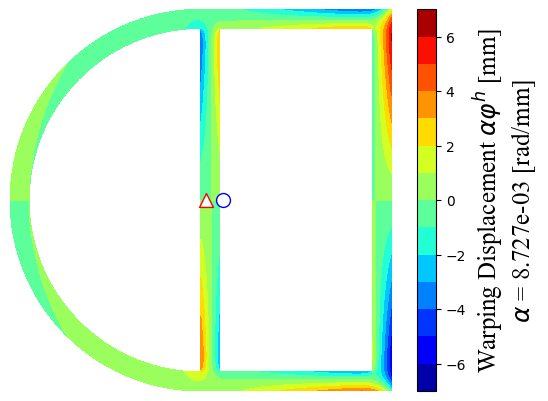

In [3]:
# Maximum and minimum displacement values from ABAQUS
vmax =  6.425
vmin = -6.425

# Twist rate [rad/m]
rate = np.radians(0.05)*10

## Warping
fig, ax = sec.plotWarping(twistRate=rate, levels=12, showMesh=False, 
                          lengthUnits='mm', vmax=vmax,vmin=vmin, 
                          cbarKwargs=dict(ticks=None)
                          )

# Remove legend and axis frame 
ax.get_legend().remove()
ax.axis('off')

